In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly_express as px
import plotly.graph_objs as go

In [393]:
import matplotlib.ticker as ticker


In [2]:
df_disponibilite = pd.read_csv('/Users/helmisaddem/Documents/DAN-P9-data 2/DisponibiliteAlimentaire_2017.csv')

In [4]:
df_population = pd.read_csv('/Users/helmisaddem/Documents/DAN-P9-data 2/Population_2000_2018.csv')

In [276]:
donnees_securite = pd.read_csv('/Users/helmisaddem/Documents/donnees_securite.csv')

In [275]:
donnees_economiques = pd.read_csv('/Users/helmisaddem/Documents/donnees_economiques.csv')

In [306]:
df_croissance = pd.read_csv('/Users/helmisaddem/Documents/croissance_2017.csv')

In [277]:
# Crée la liste des DataFrames
dfs = ['df_disponibilite', 'df_population', 'donnees_securite', 'donnees_economiques', 'df_croissance']

# Affiche la taille des DataFrames
print(f'Dimensions des DataFrames :')
for df in dfs:
    print(f'- {df} : {eval(df).shape}')

del df

Dimensions des DataFrames :
- df_disponibilite : (176600, 14)
- df_population : (4411, 15)
- donnees_securite : (792, 15)
- donnees_economiques : (844, 15)


In [15]:
#fonction qui va enlever les caractère spéciaux des noms de colonnes
def snake_case (df):
    """Renomme les variables d'un DataFrame selon la convention snake case."""
    df.columns = (
        df.columns
        .str.lower()
        .str.replace('\'', '_')
        .str.replace(' - ', '_')
        .str.replace('-', '_')
        .str.replace(' ', '_')
        .str.normalize('NFKD')
        .str.encode('ascii', errors='ignore')
        .str.decode('utf-8')
    )

In [278]:
# Appliquer la fonction 'snake_case' aux DataFrames
for df in dfs:
    snake_case(eval(df))

del df

In [30]:
df_total = df_population.loc[
    df_population['annee'] == 2017, ['code_zone', 'zone', 'valeur']
].reset_index()

In [32]:
df_total.rename(
    columns={'valeur': 'population_milles_hab'}, inplace=True)

In [33]:
df_total.head()

,index,code_zone,zone,population_milles_hab
0,17,2,Afghanistan,36296.113
1,36,202,Afrique du Sud,57009.756
2,55,3,Albanie,2884.169
3,74,4,Algérie,41389.189
4,93,79,Allemagne,82658.409


In [34]:
#temporary_table pour le calcul du pourcentage d'évolution de la population
temporary_table = df_population.pivot_table(
    index='annee', columns=['code_zone', 'zone'], values='valeur').fillna(method='bfill', axis='rows').pct_change().mean().to_frame(name='evolution_population_pct').reset_index()

/var/folders/r_/fd0gwkxn6n995_hk_5lc9f540000gn/T/ipykernel_93035/2345157236.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  index='annee', columns=['code_zone', 'zone'], values='valeur').fillna(method='bfill', axis='rows').pct_change().mean().to_frame(name='evolution_population_pct').reset_index()
/var/folders/r_/fd0gwkxn6n995_hk_5lc9f540000gn/T/ipykernel_93035/2345157236.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  index='annee', columns=['code_zone', 'zone'], values='valeur').fillna(method='bfill', axis='rows').pct_change().mean().to_frame(name='evolution_population_pct').reset_index()


In [35]:
df_total = pd.merge(
    df_total,
    temporary_table[['code_zone', 'evolution_population_pct']],
    on='code_zone',
    how='left')

In [37]:
df_total["evolution_population_pct"] = round((df_total["evolution_population_pct"]*100),2)

In [38]:
df_total.head()

,index,code_zone,zone,population_milles_hab,evolution_population_pct
0,17,2,Afghanistan,36296.113,3.29
1,36,202,Afrique du Sud,57009.756,1.40
2,55,3,Albanie,2884.169,-0.45
3,74,4,Algérie,41389.189,1.72
4,93,79,Allemagne,82658.409,0.12


In [53]:
df_temporary = df_disponibilite.loc[df_disponibilite['element'] == 'Nourriture'].pivot_table(
    index='code_zone', columns='produit', values='valeur'
).reset_index().fillna(0)

In [54]:
# quantité de viande de volailles consommées par chaque pays et pourcentage de la quantité totale consommée
#pourcentage calculé à partir des valeurs en milliers de tonnes de viande de volailles divisée par les quantités en milliers de tonnes
#d'autres denrées destinées a l'alimentation humaine (nourriture)
df_temporary['consommation_volaille_pct'] = round((
    df_temporary['Viande de Volailles'] * 100 / df_temporary.sum(axis='columns') 
),2)

In [55]:
df_temporary.head()

produit,code_zone,Abats Comestible,"Agrumes, Autres","Alcool, non Comestible",Aliments pour enfants,Ananas et produits,Animaux Aquatiques Autre,Arachides Decortiquees,Avoine,Bananes,...,Tomates et produits,Viande d'Ovins/Caprins,Viande de Anim Aquatiq,Viande de Bovins,Viande de Suides,Viande de Volailles,"Viande, Autre",Vin,"Épices, Autres",consommation_volaille_pct
0,1,18.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,12.0,...,184.0,9.0,0.0,52.0,26.0,47.0,0.0,5.0,0.0,1.59
1,2,53.0,48.0,0.0,4.0,0.0,0.0,1.0,0.0,133.0,...,0.0,151.0,0.0,95.0,0.0,55.0,11.0,0.0,15.0,0.42
2,3,17.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,...,212.0,26.0,0.0,42.0,21.0,47.0,0.0,29.0,0.0,1.29
3,4,57.0,1.0,0.0,18.0,8.0,0.0,4.0,0.0,86.0,...,1262.0,277.0,0.0,192.0,0.0,264.0,15.0,0.0,15.0,0.80
4,7,53.0,252.0,0.0,5.0,657.0,0.0,121.0,1.0,1039.0,...,95.0,23.0,0.0,129.0,224.0,315.0,10.0,34.0,0.0,1.85


In [56]:
df_total = pd.merge(
    df_total,
    df_temporary[['code_zone', 'consommation_volaille_pct']],
    how='left',
    on='code_zone'
)
del df_temporary

In [148]:
#A partir de la table disponibilité viandes de volailles je garde les colonnes qui m'interesse 
#df_disponibilite_volailles.pivot_table(index='code_zone', columns='element', values='valeur').reset_index()
df_reduit = df_disponibilite.loc[df_disponibilite["produit"] == "Viande de Volailles"].pivot_table(index='code_zone', columns='element', values='valeur').reset_index()[["code_zone",
                                        "Disponibilité alimentaire (Kcal/personne/jour)", 
                                        "Disponibilité alimentaire en quantité (kg/personne/an)",
                                        "Disponibilité intérieure",
                                        "Exportations - Quantité",
                                        "Importations - Quantité",
                                        "Production"]]

In [149]:
df_reduit.head(10)

element,code_zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,1,54.0,16.06,47.0,0.0,35.0,11.0
1,2,5.0,1.53,57.0,NaN,29.0,28.0
2,3,85.0,16.36,47.0,0.0,38.0,13.0
3,4,22.0,6.38,277.0,0.0,2.0,275.0
4,7,35.0,10.56,319.0,0.0,277.0,42.0
5,8,233.0,54.10,7.0,0.0,7.0,0.0
6,9,182.0,42.24,1962.0,207.0,8.0,2161.0
7,10,192.0,47.65,1171.0,42.0,16.0,1269.0
8,11,65.0,18.20,173.0,78.0,110.0,148.0
9,12,182.0,43.17,26.0,NaN,24.0,6.0


In [150]:
snake_case(df_reduit)

In [152]:
df_reduit["TDI"] = round((df_reduit["importations_quantite"]*100/(
    df_reduit["importations_quantite"]+df_reduit["production"]-df_reduit["exportations_quantite"])),2)

In [158]:
df_reduit.head()

element,code_zone,disponibilite_alimentaire_(kcal/personne/jour),disponibilite_alimentaire_en_quantite_(kg/personne/an),disponibilite_interieure,exportations_quantite,importations_quantite,production,TDI
0,1,54.0,16.06,47.0,0.0,35.0,11.0,76.09
1,2,5.0,1.53,57.0,NaN,29.0,28.0,NaN
2,3,85.0,16.36,47.0,0.0,38.0,13.0,74.51
3,4,22.0,6.38,277.0,0.0,2.0,275.0,0.72
4,7,35.0,10.56,319.0,0.0,277.0,42.0,86.83


In [153]:
df_total = pd.merge(df_total, df_reduit[["code_zone", "TDI", "disponibilite_alimentaire_en_quantite_(kg/personne/an)"]], on="code_zone", how="left")


In [280]:
donnees_economiques.rename(columns={"code_zone_(fao)":"code_zone"}, inplace=True)

In [440]:
donnees_economiques.head(3)

,code_domaine,domaine,code_zone,zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole,note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,18896.352021,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22011,Revenu national brut,2017,2017,Millions d’USD,19145.017023,X,Ciffre de sources internationales,NaN


In [287]:
df_total = pd.merge(df_total, donnees_economiques.loc[(donnees_economiques['element'] == 'Valeur US $ par habitant')
        & (donnees_economiques['produit'] == 'Produit Intérieur Brut')][["code_zone", "valeur"]], on="code_zone", how="left")

In [288]:
df_total.head()

,index,code_zone,zone,population_milles_hab,evolution_population_pct,consommation_volaille_pct,TDI,disponibilite_alimentaire_en_quantite_(kg/personne/an),PIB_par_habitant,revenu_brut_habitant,valeur_x,valeur_y
0,17,2,Afghanistan,36296.113,3.29,0.42,NaN,1.53,2096.1,537.126294,530.149831,1.889635e+04
1,36,202,Afrique du Sud,57009.756,1.40,6.37,24.27,35.69,13950.5,6537.504869,6723.928582,3.808514e+05
2,55,3,Albanie,2884.169,-0.45,1.29,74.51,16.36,12771,4532.791977,4521.752217,1.301973e+04
3,74,4,Algérie,41389.189,1.72,0.80,0.72,6.38,11809.5,4081.775086,4134.936055,1.700970e+05
4,93,79,Allemagne,82658.409,0.12,2.06,49.24,19.47,53071.5,45734.557501,44670.222282,3.690849e+06


In [289]:
df_total = df_total.drop(columns=["PIB_par_habitant", "revenu_brut_habitant", "valeur_y"])

In [290]:
df_total.rename(columns={"valeur_x":"PIB_par_habitant"}, inplace=True)

In [291]:
df_total.head()

,index,code_zone,zone,population_milles_hab,evolution_population_pct,consommation_volaille_pct,TDI,disponibilite_alimentaire_en_quantite_(kg/personne/an),PIB_par_habitant
0,17,2,Afghanistan,36296.113,3.29,0.42,NaN,1.53,530.149831
1,36,202,Afrique du Sud,57009.756,1.40,6.37,24.27,35.69,6723.928582
2,55,3,Albanie,2884.169,-0.45,1.29,74.51,16.36,4521.752217
3,74,4,Algérie,41389.189,1.72,0.80,0.72,6.38,4134.936055
4,93,79,Allemagne,82658.409,0.12,2.06,49.24,19.47,44670.222282


In [293]:
donnees_securite.rename(columns={"code_zone_(fao)":"code_zone"}, inplace=True)

In [297]:
df_total = pd.merge(df_total, 
                    donnees_securite.loc[donnees_securite["code_produit"] == 21032][["code_zone", "valeur"]],
                    on = "code_zone",
                    how="left")


In [299]:
df_total.rename(columns={"valeur":"indice_stabilite_politique"}, inplace=True)

In [300]:
df_total.head()

,index,code_zone,zone,population_milles_hab,evolution_population_pct,consommation_volaille_pct,TDI,disponibilite_alimentaire_en_quantite_(kg/personne/an),PIB_par_habitant,indice_stabilite_politique
0,17,2,Afghanistan,36296.113,3.29,0.42,NaN,1.53,530.149831,-2.8
1,36,202,Afrique du Sud,57009.756,1.40,6.37,24.27,35.69,6723.928582,-0.28
2,55,3,Albanie,2884.169,-0.45,1.29,74.51,16.36,4521.752217,0.38
3,74,4,Algérie,41389.189,1.72,0.80,0.72,6.38,4134.936055,-0.92
4,93,79,Allemagne,82658.409,0.12,2.06,49.24,19.47,44670.222282,0.59


In [307]:
snake_case(df_croissance)

In [310]:
df_croissance.rename(columns={"code_zone_(fao)":"code_zone"}, inplace=True)

In [312]:
df_total = pd.merge(df_total, 
                    df_croissance.loc[df_croissance["code_element"] == 6129][["code_zone", "valeur"]],
                    on="code_zone",
                    how="left")


In [313]:
df_total.rename(columns={"valeur":"pib_pct_croissance"}, inplace=True) 

In [316]:
df_total.head()

,index,code_zone,zone,population_milles_hab,evolution_population_pct,consommation_volaille_pct,TDI,disponibilite_alimentaire_en_quantite_(kg/personne/an),PIB_par_habitant,indice_stabilite_politique,pib_pct_croissance
0,17,2,Afghanistan,36296.113,3.29,0.42,NaN,1.53,530.149831,-2.8,4.865789
1,36,202,Afrique du Sud,57009.756,1.40,6.37,24.27,35.69,6723.928582,-0.28,17.703799
2,55,3,Albanie,2884.169,-0.45,1.29,74.51,16.36,4521.752217,0.38,9.765943
3,74,4,Algérie,41389.189,1.72,0.80,0.72,6.38,4134.936055,-0.92,6.287892
4,93,79,Allemagne,82658.409,0.12,2.06,49.24,19.47,44670.222282,0.59,6.441276


In [441]:
df_total = pd.merge(df_total, donnees_economiques.loc[(donnees_economiques['element'] == 'Valeur US $ par habitant')
        & (donnees_economiques['produit'] == 'Revenu national brut')][["code_zone", "valeur"]], on="code_zone", how="left")

In [443]:
df_total.rename(columns={"valeur":"RNB_par_habitant"}, inplace=True)

In [444]:
df_total.head(3)

,index,code_zone,zone,population_milles_hab,evolution_population_pct,consommation_volaille_pct,TDI,disponibilite_alimentaire_en_quantite_(kg/personne/an),PIB_par_habitant,indice_stabilite_politique,pib_pct_croissance,RNB_par_habitant
0,17,2,Afghanistan,36296.113,3.29,0.42,NaN,1.53,530.149831,-2.8,4.865789,537.126294
1,36,202,Afrique du Sud,57009.756,1.40,6.37,24.27,35.69,6723.928582,-0.28,17.703799,6537.504869
2,55,3,Albanie,2884.169,-0.45,1.29,74.51,16.36,4521.752217,0.38,9.765943,4532.791977


In [445]:
print(f'Nombre de doublons dans le DataFrame : {df_total.duplicated().sum()}')

Nombre de doublons dans le DataFrame : 0


In [446]:
print(f'Dimensions du DataFrame : {df_total.shape}')

Dimensions du DataFrame : (183, 12)


In [447]:
df_total.isna().sum()

index                                                      0
code_zone                                                  0
zone                                                       0
population_milles_hab                                      0
evolution_population_pct                                   0
consommation_volaille_pct                                  9
TDI                                                       48
disponibilite_alimentaire_en_quantite_(kg/personne/an)    11
PIB_par_habitant                                           2
indice_stabilite_politique                                 7
pib_pct_croissance                                         2
RNB_par_habitant                                           2
dtype: int64

In [448]:
#supprimer les pays dont on ne dispose pas d'informations importantes tel que le pourcentage de 
#consommation de viande de volaille, taux de dépendance des importations et la disponibilité alimentaire
df_final = df_total.loc[
    (~df_total['consommation_volaille_pct'].isna())
    & (~df_total['TDI'].isna())
    & (~df_total['disponibilite_alimentaire_en_quantite_(kg/personne/an)'].isna())
]


In [449]:
# examiner le reste des informations manquantes : 
df_final[df_final.isna().any(axis='columns')]

,index,code_zone,zone,population_milles_hab,evolution_population_pct,consommation_volaille_pct,TDI,disponibilite_alimentaire_en_quantite_(kg/personne/an),PIB_par_habitant,indice_stabilite_politique,pib_pct_croissance,RNB_par_habitant
36,823,41,"Chine, continentale",1421021.791,0.56,1.27,2.50,12.33,8729.136930,NaN,9.589146,8717.698269
37,842,214,"Chine, Taiwan Province de",23674.546,0.43,5.11,20.00,33.17,NaN,NaN,NaN,NaN
134,3219,70,Polynésie française,276.102,0.80,5.08,93.75,47.40,19743.958993,NaN,6.190222,19743.958993


In [ ]:
# En regardant le TDI de la chine continentale et de Taiwan on se rend compte qu'il est faible et que ses 
# pays comptent pratiquement sur leur resssources internes (+ argument géographique donc cout du transport ) donc on peut les omettre 
#reste la polynésie française qui manque une seule valeur qui est le TDI et qu'on peut lui affecter celui de la France 

In [450]:
df_final.loc[
    df_final['zone'] == 'France', 'indice_stabilite_politique'].values

array(['0.28'], dtype=object)

In [451]:
df_final.loc[df_final['zone'] == 'Polynésie française',
    'indice_stabilite_politique'] = df_final.loc[
    df_final['zone'] == 'France', 'indice_stabilite_politique'].values

In [452]:
df_final[df_final.isna().any(axis='columns')]

,index,code_zone,zone,population_milles_hab,evolution_population_pct,consommation_volaille_pct,TDI,disponibilite_alimentaire_en_quantite_(kg/personne/an),PIB_par_habitant,indice_stabilite_politique,pib_pct_croissance,RNB_par_habitant
36,823,41,"Chine, continentale",1421021.791,0.56,1.27,2.5,12.33,8729.13693,NaN,9.589146,8717.698269
37,842,214,"Chine, Taiwan Province de",23674.546,0.43,5.11,20.0,33.17,NaN,NaN,NaN,NaN


In [453]:
df_final = df_final.loc[
    (~df_final['indice_stabilite_politique'].isna())]

In [454]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 1 to 181
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   index                                                   133 non-null    int64  
 1   code_zone                                               133 non-null    int64  
 2   zone                                                    133 non-null    object 
 3   population_milles_hab                                   133 non-null    float64
 4   evolution_population_pct                                133 non-null    float64
 5   consommation_volaille_pct                               133 non-null    float64
 6   TDI                                                     133 non-null    float64
 7   disponibilite_alimentaire_en_quantite_(kg/personne/an)  133 non-null    float64
 8   PIB_par_habitant                             

In [455]:
liste_initiale_zones = set(df_total['zone'].unique())
liste_finale_zones = set(df_final['zone'].unique())
# Crée la liste des zones supprimées
liste_zones_supprimees = liste_initiale_zones - liste_finale_zones

# Affiche la liste des zones supprimées
print(len(liste_zones_supprimees))

50


In [ ]:

# Au total j'ai supprimé 50 pays soit par manque d'info pour les indicateurs considérés les plus importants soit pour 
#un TDI faible après premier filtrage 

In [456]:
df_final.head()

,index,code_zone,zone,population_milles_hab,evolution_population_pct,consommation_volaille_pct,TDI,disponibilite_alimentaire_en_quantite_(kg/personne/an),PIB_par_habitant,indice_stabilite_politique,pib_pct_croissance,RNB_par_habitant
1,36,202,Afrique du Sud,57009.756,1.40,6.37,24.27,35.69,6723.928582,-0.28,17.703799,6537.504869
2,55,3,Albanie,2884.169,-0.45,1.29,74.51,16.36,4521.752217,0.38,9.765943,4532.791977
3,74,4,Algérie,41389.189,1.72,0.80,0.72,6.38,4134.936055,-0.92,6.287892,4081.775086
4,93,79,Allemagne,82658.409,0.12,2.06,49.24,19.47,44670.222282,0.59,6.441276,45734.557501
5,131,7,Angola,29816.766,3.57,1.85,86.83,10.56,4042.681403,-0.38,20.766646,3791.443851


In [462]:
#Si on veut supprimer PIB_par_habitant, on le supprime à ce niveau 
df_final_new = df_final.drop(columns=["code_zone", "index"], axis=1).reset_index().drop(columns=["index"], axis=1)

In [463]:
df_final_new.head(3)

,zone,population_milles_hab,evolution_population_pct,consommation_volaille_pct,TDI,disponibilite_alimentaire_en_quantite_(kg/personne/an),PIB_par_habitant,indice_stabilite_politique,pib_pct_croissance,RNB_par_habitant
0,Afrique du Sud,57009.756,1.40,6.37,24.27,35.69,6723.928582,-0.28,17.703799,6537.504869
1,Albanie,2884.169,-0.45,1.29,74.51,16.36,4521.752217,0.38,9.765943,4532.791977
2,Algérie,41389.189,1.72,0.80,0.72,6.38,4134.936055,-0.92,6.287892,4081.775086


In [464]:
#je constate que l'indice de stabilité politique n'est pas de type float : problème avec les graph
df_final_new["indice_stabilite_politique"] = df_final_new["indice_stabilite_politique"].astype('float64')

In [458]:
# voir si la population formée par nos pays représente plus de 60% de la population mondiale en 2017 
(df_final_new["population_milles_hab"]*1000).sum()
# population mondiale en 2017 : 7369316352.32


5249893313.0

In [459]:
(((df_final_new["population_milles_hab"]*1000).sum()*100)/7369316352.32).round(2)


71.24

In [465]:
indicateurs = (list(df_final_new.columns))
indicateurs.remove('zone')
print(indicateurs)

['population_milles_hab', 'evolution_population_pct', 'consommation_volaille_pct', 'TDI', 'disponibilite_alimentaire_en_quantite_(kg/personne/an)', 'PIB_par_habitant', 'indice_stabilite_politique', 'pib_pct_croissance', 'RNB_par_habitant']


In [466]:
df_final_new.describe().T.style.format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
population_milles_hab,133.00,39472.88,124521.02,52.05,3436.64,9785.84,33101.18,1338676.78
evolution_population_pct,133.00,1.24,1.26,-1.23,0.37,1.06,1.93,6.58
consommation_volaille_pct,133.00,2.89,1.93,0.13,1.60,2.42,3.81,8.12
TDI,133.00,38.69,48.91,0.00,4.00,20.61,69.23,338.43
disponibilite_alimentaire_en_quantite_(kg/personne/an),133.00,22.49,14.78,0.45,12.33,20.33,30.58,67.39
PIB_par_habitant,133.00,16696.24,20714.81,487.01,3569.72,6975.77,20138.15,110203.01
indice_stabilite_politique,133.00,0.00,0.87,-2.94,-0.50,0.06,0.65,1.60
pib_pct_croissance,133.00,7.34,6.50,-27.80,5.04,7.46,10.27,23.29
RNB_par_habitant,133.00,16172.32,19464.23,479.35,3485.69,6605.05,19743.96,81118.45


In [467]:
df_final_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 10 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   zone                                                    133 non-null    object 
 1   population_milles_hab                                   133 non-null    float64
 2   evolution_population_pct                                133 non-null    float64
 3   consommation_volaille_pct                               133 non-null    float64
 4   TDI                                                     133 non-null    float64
 5   disponibilite_alimentaire_en_quantite_(kg/personne/an)  133 non-null    float64
 6   PIB_par_habitant                                        133 non-null    float64
 7   indice_stabilite_politique                              133 non-null    float64
 8   pib_pct_croissance                      

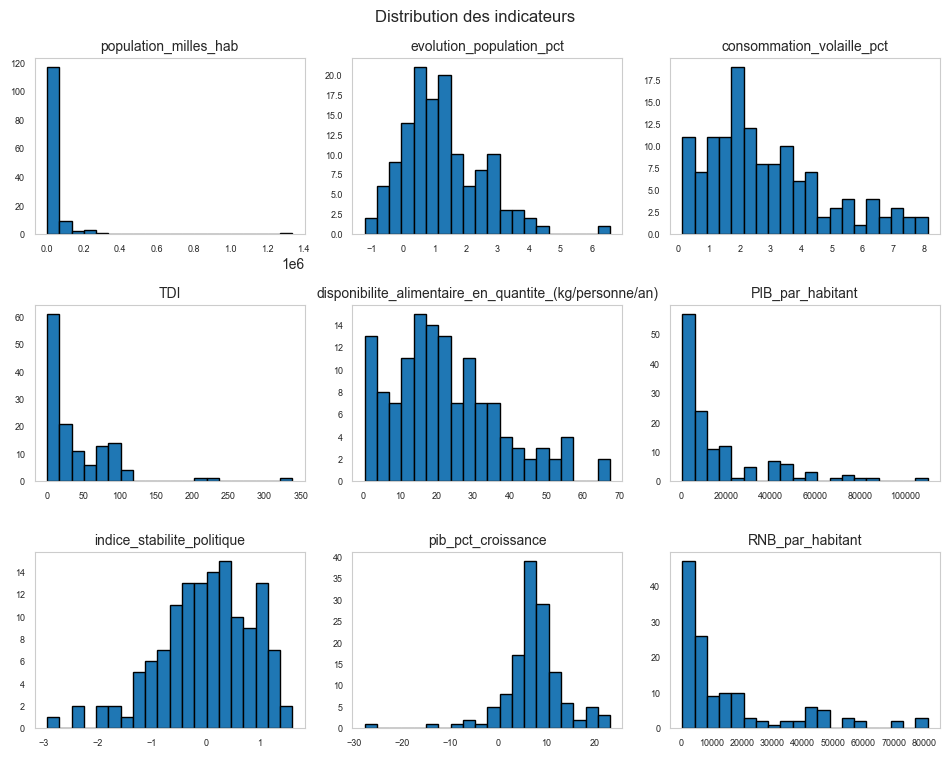

In [468]:

#distribution des indicateurs pour chaque variable

fig, axs = plt.pyplot.subplots(3, 3, figsize=(9.6, 7.68))

for i, indicateur in enumerate(indicateurs):
    r = i // 3
    c = i % 3
    axs[r, c].hist(indicateur, data=df_final_new, edgecolor='k', bins=20)
    axs[r, c].set_title(indicateur, size=10)
    axs[r, c].tick_params(axis='both', which='both', labelsize=6.5)

# Supprime les graphiques vides
[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

fig.suptitle('Distribution des indicateurs')

plt.pyplot.tight_layout()

plt.pyplot.show()

del fig, axs, i, r, c, indicateur

In [ ]:
#quand j'ai changé le type de la colonne (object --> float64) indice de stabilité, l'axe des abscisses a changé

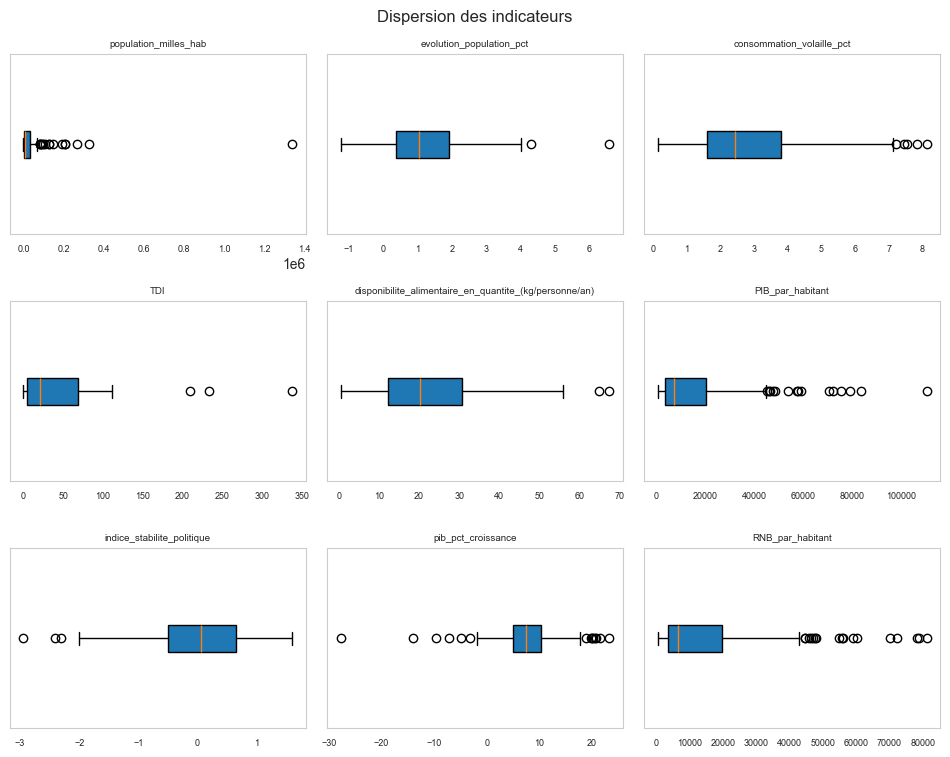

In [469]:
# Dispersion des indicateurs pour chaque variable

fig, axs = plt.pyplot.subplots(3, 3, figsize=(9.6, 7.68))

for i, indicateur in enumerate(indicateurs):
    r = i // 3
    c = i % 3
    axs[r, c].boxplot(indicateur, data=df_final_new, patch_artist=True, vert=False)
    axs[r, c].set_title(indicateur, size=7)
    axs[r, c].yaxis.set_major_locator(plt.pyplot.NullLocator())
    axs[r, c].tick_params(axis='x', which='both', labelsize=6.5)


[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

fig.suptitle('Dispersion des indicateurs')

plt.pyplot.tight_layout()

plt.pyplot.show()

del fig, axs, i, indicateur, r, c

In [ ]:
# données non centrée donc distribution non normale, plusieurs outliers : vraies valeurs aberrantes ou non ? 
#je crée une fontion outliers_values qui m'affiche tous les outliers pour bien les étudier et trancher si c'est des valeurs à garder ou à 
#supprimer

In [425]:
def outliers_values(indicateur):


    
    Q1 = df_final_new[indicateur].quantile(0.25)
    Q3 = df_final_new[indicateur].quantile(0.75)
    IQR = Q3 - Q1
    max_boxplot = 1.5 * IQR + Q3
    min_boxplot = Q1 - 1.5 * IQR

    
   
    return (df_final_new.loc[
            (df_final_new[indicateur] >= max_boxplot) | (df_final_new[indicateur] <= min_boxplot), ['zone', indicateur]
        ].sort_values(by=indicateur, ascending=False))


In [470]:
outliers_values(indicateurs[8])

,zone,RNB_par_habitant
118,Suisse,81118.449929
76,Luxembourg,78873.811051
89,Norvège,78263.704694
61,Islande,72312.699769
26,Chine - RAS de Macao,70300.937274
42,États-Unis d'Amérique,60297.391594
33,Danemark,59155.352625
60,Irlande,56058.607923
9,Australie,55633.452624
117,Suède,54722.389209


In [471]:
matrice_corr = df_final_new.corr(numeric_only=True, method='spearman')
matrice_corr.style.format('{:.2f}')

,population_milles_hab,evolution_population_pct,consommation_volaille_pct,TDI,disponibilite_alimentaire_en_quantite_(kg/personne/an),PIB_par_habitant,indice_stabilite_politique,pib_pct_croissance,RNB_par_habitant
population_milles_hab,1.00,0.18,-0.07,-0.49,-0.21,-0.17,-0.49,-0.01,-0.17
evolution_population_pct,0.18,1.00,-0.03,-0.08,-0.21,-0.36,-0.38,-0.13,-0.36
consommation_volaille_pct,-0.07,-0.03,1.00,0.02,0.88,0.38,0.16,-0.02,0.38
TDI,-0.49,-0.08,0.02,1.00,0.11,0.26,0.39,0.05,0.26
disponibilite_alimentaire_en_quantite_(kg/personne/an),-0.21,-0.21,0.88,0.11,1.00,0.58,0.38,0.02,0.58
PIB_par_habitant,-0.17,-0.36,0.38,0.26,0.58,1.00,0.71,0.05,1.00
indice_stabilite_politique,-0.49,-0.38,0.16,0.39,0.38,0.71,1.00,0.06,0.70
pib_pct_croissance,-0.01,-0.13,-0.02,0.05,0.02,0.05,0.06,1.00,0.05
RNB_par_habitant,-0.17,-0.36,0.38,0.26,0.58,1.00,0.70,0.05,1.00


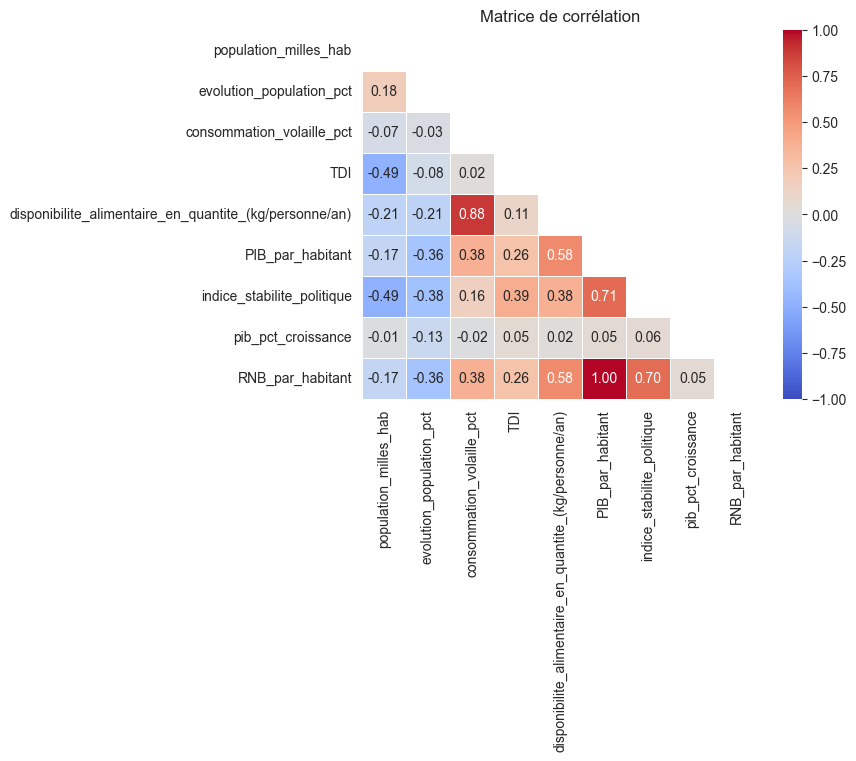

In [472]:
fig, ax = plt.pyplot.subplots(figsize=(6.4, 4.8))
mask = np.triu(np.ones_like(matrice_corr, dtype=bool))
sns.heatmap(matrice_corr, annot=True, fmt='.2f', vmin=-1, vmax=1,
annot_kws=None, linewidths=0.6, cmap='coolwarm', ax=ax, mask=mask)

ax.set_title('Matrice de corrélation')

plt.pyplot.show()

del fig, ax

In [ ]:
#Forte correlation positive entre : 
##disponibilité alimentaire en Kg/personne/an et pourcentage de consommation de volaille
##RNB par habitant et indice de stabilité politique : 0.7
##RNB par habitant et disponiblité alimentaire en Kg/personne/an

In [ ]:
fig, ax = plt.pyplot.subplots(figsize=(6, 4))
mask = np.triu(np.ones_like(df_final_new[["RNB_par_habitant", "consommation_volaille_pct", "disponibilite_alimentaire_en_quantite_(kg/personne/an)",
              "indice_stabilite_politique", "TDI"]].corr(method='spearman'), dtype=bool))
sns.heatmap(df_final_new[["RNB_par_habitant", "consommation_volaille_pct", "disponibilite_alimentaire_en_quantite_(kg/personne/an)",
              "indice_stabilite_politique", "TDI"]].corr(method='spearman'), annot=True, fmt='.2f', vmin=-1, vmax=1,
annot_kws=None, linewidths=0.6, cmap='coolwarm', ax=ax, mask=mask)

ax.set_title('Matrice de corrélation')

plt.pyplot.show()

del fig, ax

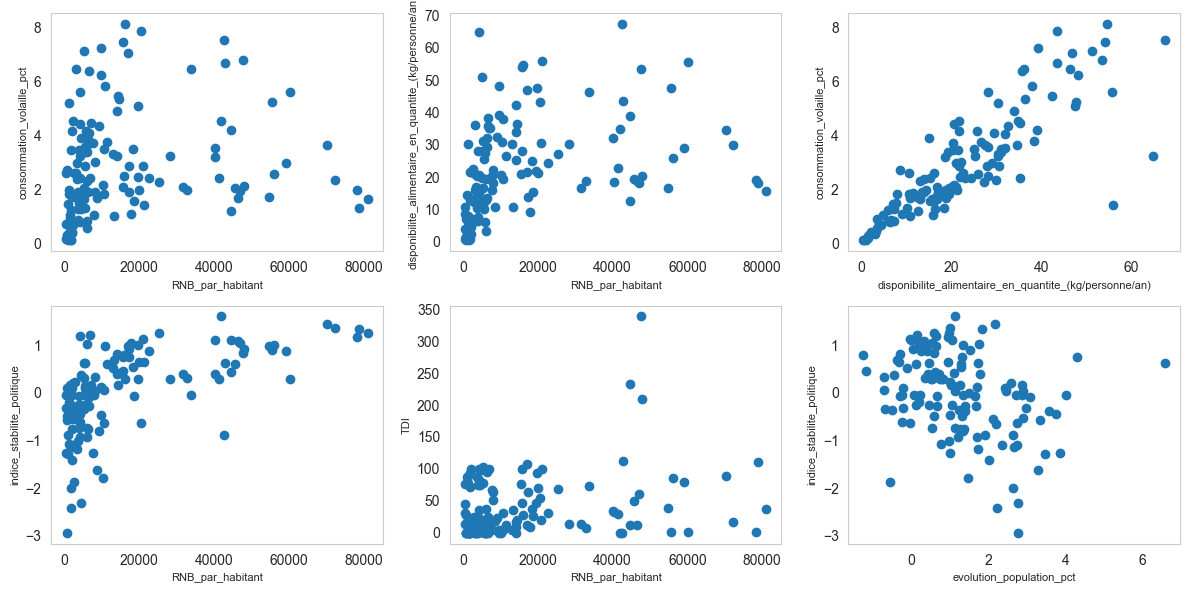

In [498]:
fig, axs = plt.pyplot.subplots(nrows=2, ncols=3,
                            figsize=(12, 6))
i = 0
for r in range(2):
    for c in range(2):
        axs[r, c].scatter(df_final_new["RNB_par_habitant"], df_final_new[list[i]])
        axs[r, c].set_xlabel("RNB_par_habitant", size=8)
        axs[r, c].set_ylabel(list[i], size=8)
        i += 1

axs[0, 2].scatter(df_final_new["disponibilite_alimentaire_en_quantite_(kg/personne/an)"], 
                  df_final_new["consommation_volaille_pct"])
axs[0, 2].set_xlabel("disponibilite_alimentaire_en_quantite_(kg/personne/an)", size=8)
axs[0, 2].set_ylabel("consommation_volaille_pct", size=8)

axs[1, 2].scatter(df_final_new["evolution_population_pct"], 
                  df_final_new["indice_stabilite_politique"])
axs[1, 2].set_xlabel("evolution_population_pct", size=8)
axs[1, 2].set_ylabel("indice_stabilite_politique", size=8)

fig.tight_layout()


In [ ]:
#Analyse en Composantes principales : 

In [502]:
import sklearn
from sklearn.preprocessing import StandardScaler #pour standaridiser les données
from sklearn.decomposition import PCA

In [503]:
data_set_only_quant = df_final_new.drop('zone', axis='columns')

In [ ]:
#standaridisation des données : les centrer et les réduire
scaler = StandardScaler()
data_set_only_quant_scaled = scaler.fit_transform(data_set_only_quant)


In [505]:
pays = df_final_new['zone'].to_numpy()
indicators = data_set_only_quant.columns.to_numpy()

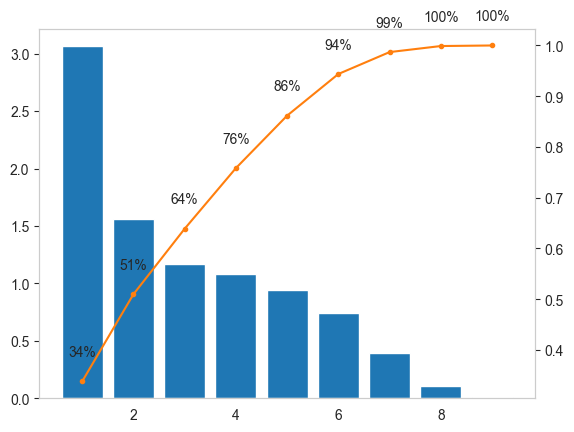

In [507]:
#Diagramme des éboulis : 
plt.pyplot.bar(np.arange(1, (len(PCA().fit(data_set_only_quant_scaled).explained_variance_)+1)), PCA().fit(data_set_only_quant_scaled).explained_variance_)
plt.pyplot.twinx()
plt.pyplot.plot(np.arange(1, (len(PCA().fit(data_set_only_quant_scaled).explained_variance_)+1)), PCA().fit(data_set_only_quant_scaled).explained_variance_ratio_.cumsum(), color='C1', marker='.')
for x, y in enumerate(PCA().fit(data_set_only_quant_scaled).explained_variance_ratio_.cumsum()):
    plt.pyplot.text(x+1, (y+0.05) , f'{y:.0%}', ha='center')

In [508]:
#4 dimensions ou composantes explique 76% de la quantité de variance 
pd.DataFrame(np.transpose(PCA(n_components=4).fit(data_set_only_quant_scaled).components_), 
             index=indicators,
    columns=['CP1', 'CP2', 'CP3', 'CP4'])

,CP1,CP2,CP3,CP4
population_milles_hab,-0.127009,0.052949,0.300391,0.751046
evolution_population_pct,-0.152917,-0.152026,-0.621634,0.246853
consommation_volaille_pct,0.271385,-0.681164,0.038969,0.055403
TDI,0.234470,0.141201,-0.334228,-0.371010
disponibilite_alimentaire_en_quantite_(kg/personne/an),0.383099,-0.554544,0.106675,0.016416
PIB_par_habitant,0.489474,0.264099,-0.136532,0.292778
indice_stabilite_politique,0.444386,0.201729,0.146291,-0.183411
pib_pct_croissance,0.059065,0.103357,0.585316,-0.163400
RNB_par_habitant,0.494511,0.248029,-0.126862,0.296560


In [515]:
def cercle_correlation_graph(dimension_sur_x, dimension_sur_y, pca=PCA(n_components=4).fit(data_set_only_quant_scaled), text_offset=0.04):
    '''
    Trace le cercle des corrérations d'une ACP.
    Paramètres :
    - x_d : la dimension de l'ACP a représenter sur l'axe x.
    - y_d : la dimension de l'ACP a représenter sur l'axe y.
    - pca : la décomposition effectuée.
    - text_offset : le décalage pour le positionnement des noms des
    indicateurs.
    '''

  
    vecteurs_propres = pca.components_.T
    cum_variance_ratio = (pca.explained_variance_ratio_[dimension_sur_x]
                          + pca.explained_variance_ratio_[dimension_sur_y])

   
    fig, ax = plt.pyplot.subplots(figsize=(6.4, 6.4))

    
    ax.set_aspect('equal')
    ax.grid(alpha=0.4)
    ax.set_axisbelow(True)
    ax.set_xlim(-1.02, 1.02)
    ax.set_ylim(-1.02, 1.02)
    
    for spine in ax.spines.values():
        spine.set_visible(False)

    circle = plt.pyplot.Circle((0, 0), 1, fill=False, linewidth=1, color='0.8')
    ax.add_patch(circle)
    ax.axhline(y=0, linestyle = '--', linewidth=0.9, color='k')
    ax.axvline(x=0, linestyle = '--', linewidth=0.9, color='k')

   
    for i in range(len(vecteurs_propres)):
        
        ax.annotate(
            text='',
            xy=(vecteurs_propres[i, dimension_sur_x], vecteurs_propres[i, dimension_sur_y]),
            xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', linewidth=0.8, color='b')
        )

       
        if vecteurs_propres[i, dimension_sur_x] > 0:
            h_offset=text_offset
        elif vecteurs_propres[i, dimension_sur_x] < 0:
            h_offset=-text_offset
        
        if vecteurs_propres[i, dimension_sur_y] > 0:
            v_offset=text_offset
        elif vecteurs_propres[i, dimension_sur_y] < 0:
            v_offset=-text_offset

        
        ax.text(
            x=(vecteurs_propres[i, dimension_sur_x]+h_offset), 
            y=(vecteurs_propres[i, dimension_sur_y]+v_offset),
            s=indicators[i], fontsize=6
        )

    
    ax.set_xlabel(f'CP{dimension_sur_x + 1} ({pca.explained_variance_ratio_[dimension_sur_x]:.1%})')
    ax.set_ylabel(f'CP{dimension_sur_y + 1} ({pca.explained_variance_ratio_[dimension_sur_y]:.1%})')

    ax.set_title(
        f'Cercle des corrélations\n'
        f'Composantes principales CP{dimension_sur_x + 1} et CP{dimension_sur_y + 1} ({cum_variance_ratio:.1%})', 
        fontsize= 9)

    plt.pyplot.tight_layout()

    plt.pyplot.show()

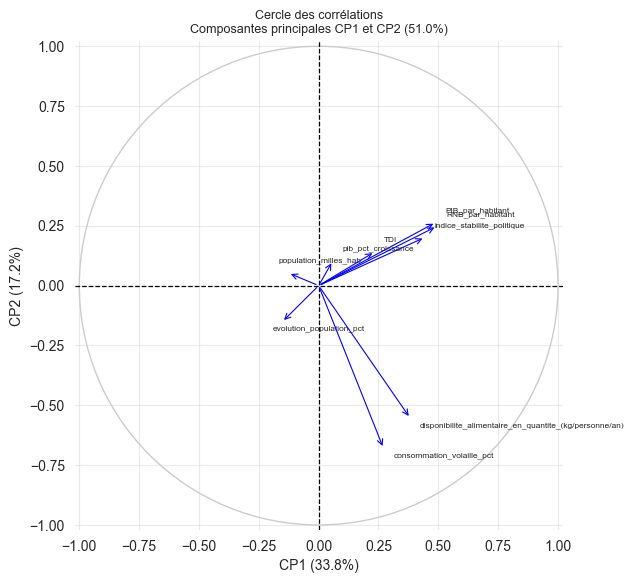

In [516]:
cercle_correlation_graph(0, 1)

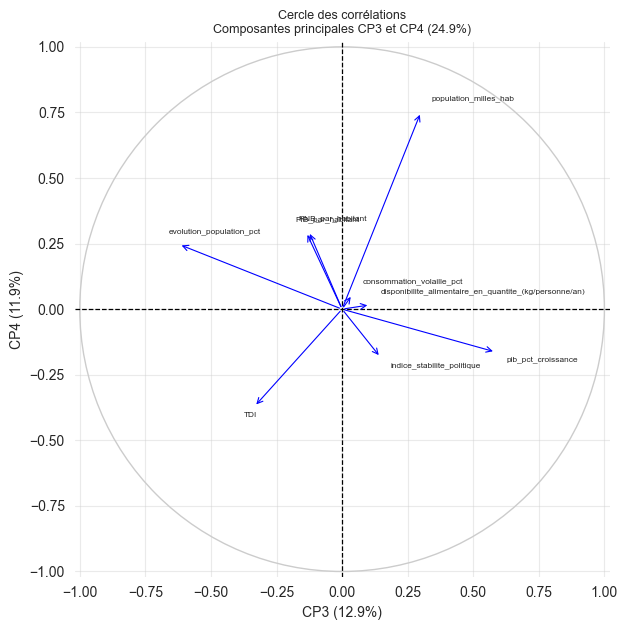

In [517]:
cercle_correlation_graph(2, 3)

In [518]:
pd.DataFrame(np.transpose(PCA(n_components=4).fit(data_set_only_quant_scaled).components_), 
             index=indicators,
    columns=['CP1', 'CP2', 'CP3', 'CP4']).style.background_gradient(axis='rows', cmap='coolwarm').format('{:.2f}')

,CP1,CP2,CP3,CP4
population_milles_hab,-0.13,0.05,0.30,0.75
evolution_population_pct,-0.15,-0.15,-0.62,0.25
consommation_volaille_pct,0.27,-0.68,0.04,0.06
TDI,0.23,0.14,-0.33,-0.37
disponibilite_alimentaire_en_quantite_(kg/personne/an),0.38,-0.55,0.11,0.02
PIB_par_habitant,0.49,0.26,-0.14,0.29
indice_stabilite_politique,0.44,0.20,0.15,-0.18
pib_pct_croissance,0.06,0.10,0.59,-0.16
RNB_par_habitant,0.49,0.25,-0.13,0.30


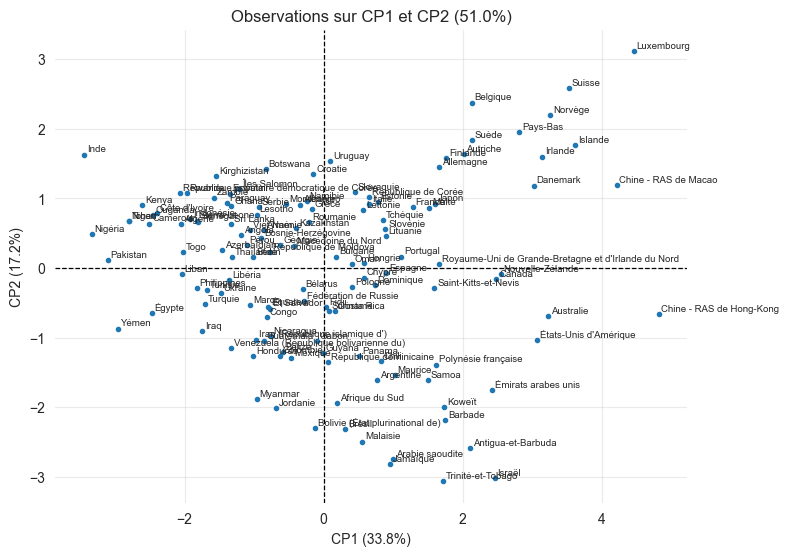

In [519]:
#Projection des pays : 

pca=PCA(n_components=4).fit(data_set_only_quant_scaled)
cum_variance_ratio = (pca.explained_variance_ratio_[0]
                          + pca.explained_variance_ratio_[1])

fig, ax = plt.pyplot.subplots(figsize=(8, 8))


ax.set_aspect('equal')
ax.grid(alpha=0.4)
ax.set_axisbelow(True)

for spine in ax.spines.values():
        spine.set_visible(False)

# Tracer les lignes en pointillés pour x = 0  et y = 0
ax.axhline(y=0, linestyle = '--', linewidth=0.9, color='k')
ax.axvline(x=0, linestyle = '--', linewidth=0.9, color='k')

# Afficher la position des individus
ax.scatter(pca.transform(data_set_only_quant_scaled)[:, 0], pca.transform(data_set_only_quant_scaled)[:, 1], marker='.')

# Ajouter les noms des individus
for i in range(len(pca.transform(data_set_only_quant_scaled))):
        ax.text(
            x=(pca.transform(data_set_only_quant_scaled)[i, 0]+0.04),
            y=(pca.transform(data_set_only_quant_scaled)[i, 1]+0.04),
            s=pays[i], fontsize='x-small'
        )
    
# Ajouter les titre (axes et figure)
ax.set_xlabel(f'CP{0 + 1} ({pca.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'CP{1 + 1} ({pca.explained_variance_ratio_[1]:.1%})')

ax.set_title(f'Observations sur CP{0 + 1} et CP{1 + 1} '
                 f'({cum_variance_ratio:.1%})')

plt.pyplot.tight_layout()

plt.pyplot.show()

In [499]:
df_final_new.to_csv('/Users/helmisaddem/Downloads/FAOSTAT_data_fr_4-14-2024 (1).csv', index=False)